# Table of Contents
 <p><div class="lev1"><a href="#Task-1.-Compiling-Ebola-Data"><span class="toc-item-num">Task 1.&nbsp;&nbsp;</span>Compiling Ebola Data</a></div>
 <div class="lev2"><a href="##Task-1.1.-Guinea"><span class="toc-item-num">Task 1.1.&nbsp;&nbsp;</span>Guinea</a></div>
 <div class="lev1"><a href="    #Task-1.2.-Liberia"><span class="toc-item-num">Task 1.2.    &nbsp;&nbsp;</span>Liberia</a></div>
 <div class="lev1"><a href="#Task-1.3.-Sierra-Leione"><span class="   toc-item-num">     Task 1.3.&nbsp;&nbsp;</span>Sierra Leone</a></div>
 <div class="lev1"><a href="#Task-1.4.-Conclusion"><span class="toc-item-num">Task 1.4.&nbsp;&nbsp;</span>Conclusion</a></div>
 
 <div class="lev1"><a href="#Task-2.-RNA-Sequences"><span class="toc-item-num">Task 2.&nbsp;&nbsp;</span>RNA Sequences</a></div>
 
 <div class="lev1"><a href="#Task-3.-Class-War-in-Titanic"><span class="toc-item-num">Task 3.&nbsp;&nbsp;</span>Class War in Titanic</a></div></p>

First of all, the main libraries useful for this homework are imported:

In [1]:
# Import libraries
import pandas as pd 
import numpy as np 
import glob 
pd.options.mode.chained_assignment = None 
from datetime import datetime, date, time
from dateutil.parser import parse

In [2]:
DATA_FOLDER = 'Data' # Use the data folder provided in Tutorial 02 - Intro to Pandas.

## Task 3. Class War in Titanic

Use pandas to import the data file `Data/titanic.xls`. It contains data on all the passengers that travelled on the Titanic.

In [3]:
# imports and random stuff (edited by us)
%pylab inline
# Website for maps of titanic: https://www.encyclopedia-titanica.org/titanic-deckplans/boat-deck.html
# (as of friday 7 october)

Populating the interactive namespace from numpy and matplotlib


/home/zampieri/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['datetime']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [4]:
DATA_FOLDER = 'Data' # Use the data folder provided in Tutorial 02 - Intro to Pandas.
from IPython.core.display import HTML
HTML(filename=DATA_FOLDER+'/titanic.html')

Name,Labels,Units,Levels,Storage,NAs
pclass,,,3,integer,0
survived,Survived,,,double,0
name,Name,,,character,0
sex,,,2,integer,0
age,Age,Year,,double,263
sibsp,Number of Siblings/Spouses Aboard,,,double,0
parch,Number of Parents/Children Aboard,,,double,0
ticket,Ticket Number,,,character,0
fare,Passenger Fare,British Pound (\243),,double,1
cabin,,,187,integer,0


For each of the following questions state clearly your assumptions and discuss your findings:
1. Describe the *type* and the *value range* of each attribute. Indicate and transform the attributes that can be `Categorical`. 
2. Plot histograms for the *travel class*, *embarkation port*, *sex* and *age* attributes. For the latter one, use *discrete decade intervals*. 
3. Calculate the proportion of passengers by *cabin floor*. Present your results in a *pie chart*.
4. For each *travel class*, calculate the proportion of the passengers that survived. Present your results in *pie charts*.
5. Calculate the proportion of the passengers that survived by *travel class* and *sex*. Present your results in *a single histogram*.
6. Create 2 equally populated *age categories* and calculate survival proportions by *age category*, *travel class* and *sex*. Present your results in a `DataFrame` with unique index.

We take a look to the dataset (here and in excel)

In [66]:
# Import Titanic data 
data_file =DATA_FOLDER +'/titanic.xls'
data = pd.read_excel(data_file)
ori_data = data.copy()
data.head(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


## Task 3.1. Question 1:
1. Describe the *type* and the *value range* of each attribute. Indicate and transform the attributes that can be `Categorical`. 

We start by replacing the nan with values that are neither above the max value, neither below the min values (for example by replacing them either with the max or min value that we already see). 
It is not a clean way to do it but it is fast. We do it in a copy of the dataset. This is just to have a global idea, a more throughfully analysis is done jsut below.

In [63]:
data['cabin'] = data['cabin'].fillna("M") #not the right way, but will enable us to see the max easily
data['embarked'] = data['embarked'].fillna("C") #not the right way, but will enable us to see the max easily

data['boat'] = data['boat'].fillna("1") #not the right way, but will enable us to see the max easily
data['home.dest'] = data['home.dest'].fillna("?z") #not the right way, but will enable us to see the max easily

Now we converted the types to string to use string comparisons:

In [7]:
data['ticket']    = data['ticket'].astype('str')
data['home.dest'] = data['home.dest'].astype('str') 
data['cabin']     = data['cabin'].astype('str') 
data['boat']     = data['boat'].astype('str') 
data['embarked']     = data['embarked'].astype('str') 

Now we extract the types of our objects and find min-max values. We then merged everything together to make it more readable.

In [8]:
description = pd.DataFrame(data.dtypes.copy())
min_data = pd.DataFrame(data.min())
max_data = pd.DataFrame(data.max())

description.columns=['dtype']
min_data.columns=['min_value']
max_data.columns=['max_value']
tot=description.merge(min_data, left_index=True, right_index=True, how='outer')\
                .merge(max_data, left_index=True, right_index=True, how='outer')
pd.concat([description,min_data,max_data],axis=1)

,dtype,min_value,max_value
pclass,int64,1,3
survived,int64,0,1
name,object,"Abbing, Mr. Anthony","van Melkebeke, Mr. Philemon"
sex,object,female,male
age,float64,0.1667,80
sibsp,int64,0,8
parch,int64,0,9
ticket,object,110152,WE/P 5735
fare,float64,0,512.329
cabin,object,A10,T


This is mainly informative and give meaningfull infos just for categories with numeric values. For the others categories we will do it later.

Where above when there were numbers and character we compared them with the rules of string comparisons.

We extract some more information as the number of nun-null values.

In [61]:
ori_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 143.2+ KB


## Dataset infos: 

    *. There are 14 different categaories: 
        - pclass:   the passenger class $ \in $ {1,2,3}, no missing data
        - survived: binary value for survaval
        - name:     full name, often in the form: ["surname", "abreviated title" "names"]
        - sex:      gender: male or female
        - age:      Age in years. If decimal value, we consider it was for representing age with months and days ecc.. (usually for examples for babies, in adults it may have been a typo)
        - sibsp:    Number of siblings/spouses aboard
        - parch:    Number of parents/childrens aboard
        - ticket:   Ticket number (containing also characters)
        - fare:     Prices of the ticket in british pounds
        - cabin:    Cabin number of the form "floor cabin-number"
        - embarked: Port in which the passenger has embarked
        - boat:     The safety boat that the passenger took 
        - body:     Body number of dead passenger
        - home.dest:Origin and destination of the passenger
        
    **Before** continuing any further lets eliminate the data in wich we are not interested, i.e.: 
        - boat
        - sibsp. Could have been used to find out how many persons were in each cabins
        - parch. Same remark than for sibsp
        - body
        - fare. May have been used to determine people by cabins
        - name. May have been used to find spouses, children...
        - ticket. May have been used to find out how many persons by cabins
        - home.dest
    
    (consideration: instead of doing multiples dataframes, we could have added columns to the original, to avoid copies)
        

           
    Categories that we kept, indicating if we could transforn them to categorical:
        - pclass (-> categorical)
        - embarked (-> categorical)
        - sex (-> categorical)
        - age (once by decades, once in tyo equally parted categories) (-> categorical for the decades)
        - cabin floors (-> categorical)
        - survived (-> categorical)

# Notes for the titanic:

    - The deck are: A,B,C,D,E,F,G + Boat deck + Orlop Deck + Tank Top. 
     Since there is only one person in T we suspected an error or it could be living in Tank Top... 
     After having seen the chart, it is not the tank top, so we counted it as an error.
    - We assumed F E57 is the cabin E57 of floor F since on the floor F there are subsection named by letters. This may be an error.
    
Now I take again the original data and begin the data wrangling.

In [10]:
originalDf = pd.read_excel(data_file)
myDf = originalDf.copy()
myDf.drop(['name','sibsp','parch','ticket','fare','boat','body','home.dest'],axis=1,inplace=True)
df_dropped_col=myDf.copy()
myDf.head()

,pclass,survived,sex,age,cabin,embarked
0,1,1,female,29.0000,B5,S
1,1,1,male,0.9167,C22 C26,S
2,1,0,female,2.0000,C22 C26,S
3,1,0,male,30.0000,C22 C26,S
4,1,0,female,25.0000,C22 C26,S


Transform the cabin column into one indicating the floor and adding a column indicating the number of cabin are associated to each passenger. 

Assumption: We haven't checked that each cabin nulber is a valid number for the given floor (it could be done with the map of the titanic for example). We assume that it is.

In [11]:
myDf['cabin'] = myDf['cabin'].astype('str') 

myDf['cabin count']=pd.DataFrame(myDf['cabin'].str.split(" ").apply(len))
myDf.loc[myDf.cabin == "nan", 'cabin count'] = "0"

myDf.cabin = myDf.cabin.transform(lambda x: x[0])
myDf.head()

,pclass,survived,sex,age,cabin,embarked,cabin count
0,1,1,female,29.0000,B,S,1
1,1,1,male,0.9167,C,S,2
2,1,0,female,2.0000,C,S,2
3,1,0,male,30.0000,C,S,2
4,1,0,female,25.0000,C,S,2


##### Scan for wrong values for pclass:


In [12]:
print(myDf.pclass.value_counts(),'\n\n True is good: ',myDf.pclass.value_counts().sum()==myDf.shape[0])

3    709
1    323
2    277
Name: pclass, dtype: int64 

 True is good:  True


##### Scan for wrong values for survived:

In [13]:
print('False is good news! \n We have: ',any([(myDf['survived'] != 0) & (myDf['survived'] != 1)])) 

False is good news! 
 We have:  False


##### Scan for wrong values for sex:

In [14]:
print(myDf.sex.value_counts(),'\n\n True is good! ',myDf.sex.value_counts().sum()== myDf.shape[0])
# or we could do 
print('Something wrong? ',any([(myDf['sex'] != 'male') & (myDf['sex'] != 'female')])) # if return false, it is OK!

male      843
female    466
Name: sex, dtype: int64 

 True is good!  True
Something wrong?  False


##### Scan for wrong values for age:

We have already seen the range which is reasonable, and we assume that the decimal reprensent the months so they are accepted.

In [15]:
myDf_sortedAge = myDf.copy().sort_values(['age'], ascending=[1])
#print(myDf_sortedAge.age.value_counts(),'\n\n',myDf.age.value_counts().sum())
print('#(nan) = #(non-numeric)?  ',myDf.age.value_counts().sum() == myDf.copy().dropna(subset=['age']).shape[0])
# if true is promted, it means that all non-identified values (by value_count) are NaN!

#(nan) = #(non-numeric)?   True


##### Scan for wrong values for cabin:

In [16]:
print(myDf.cabin.value_counts())

n    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: cabin, dtype: int64


considering T as a typo: he is the only one in T, and it doesn't seems like it is an habitable floor on the map
Instead, we will put him in cabin C since it is the most recurrent! 

In [17]:
myDf.cabin[(myDf['cabin'] == 'T')]='C'
print(myDf.cabin.value_counts())

n    1014
C      95
B      65
D      46
E      41
A      22
F      21
G       5
Name: cabin, dtype: int64


##### Scan for wrong values for embarked:

In [18]:
print(myDf.embarked.value_counts().sum())
myDf["embarked"][(myDf['embarked'] != 'C') & (myDf['embarked'] != 'Q') & (myDf['embarked'] != 'S')] = 'S'
print(myDf.embarked.value_counts().sum() , 'if == ',myDf.shape[0],',it is wonderful!')

1307
1309 if ==  1309 ,it is wonderful!


##### Scan for wrong values for cabin count:

In [19]:
print(myDf['cabin count'].value_counts(),'\n\n',myDf['cabin count'].value_counts().sum())
# the sum should be 1309 and the value taken should make sense to us
result_tmp = 0
for i in range(myDf['cabin count'].value_counts().shape[0]):
    result_tmp += i*myDf['cabin count'].value_counts()[i]
print('occupied found places: ',result_tmp, '  closer to 1309 would be better')

0    1014
1     254
2      26
3      10
4       5
Name: cabin count, dtype: int64 

 1309
occupied found places:  356   closer to 1309 would be better


There are too many persons without a room. Our assumption that all the persons wihtout a room where in reality associated with the multiple rooms of some passengers is then wrong. 
Our new options are:
    - the spouses sleep with their partners 
    - sons sleep with parents (or we could just put families together)
    
Some possibilities:
    - we could check what kind of room they booked... 
        - it could be linked with the different fares of same class tickets
        - check on the plans of the titanic
        
We also checked that the # nan did not change before and after our modification. 
cabins with "F "another cabin" have been considered as conataing two persons in F floor, since F floor has subsections with "neiboorhood" named after another floor. Plus the size allows us to add a person... but we should know more about the dataset to conclude.

In [20]:
print(any([(myDf['cabin count'] != 0) & (myDf['cabin count'] != 1) & (myDf['cabin count'] != 2) & (myDf['cabin count'] != 3)]))

True


#### Set everything as categorical ------------------------------------------------------------------
every thing can be set to cateorical in our case, after some modifications of the code. For age, we are gonna separate the two cases:
    - separation by decades
    - separation by two equal classe
and we will do it just after!


In [21]:
myDf['pclass']      = myDf['pclass'].astype('category')
myDf['survived']    = myDf['survived'].astype('category')
myDf['sex']         = myDf['sex'].astype('category')
myDf['cabin']       = myDf['cabin'].astype('category')
myDf['embarked']    = myDf['embarked'].astype('category')
myDf['cabin count'] = myDf['cabin count'].astype('category')

In [22]:
# for the questions where we will need age in decades
myDf_decades = myDf.copy()
myDf_decades.age = myDf_decades.age.transform(lambda x: 10*floor(x/10))
myDf_decades['age'] = myDf_decades['age'].astype('category')
myDf_decades.head()

,pclass,survived,sex,age,cabin,embarked,cabin count
0,1,1,female,20.0,B,S,1
1,1,1,male,0.0,C,S,2
2,1,0,female,0.0,C,S,2
3,1,0,male,30.0,C,S,2
4,1,0,female,20.0,C,S,2


In [23]:
# or if we need in two equal catégories of age: 
myDf_equalAge = myDf.copy()
myDf_equalAge = myDf_equalAge.dropna(subset=['age'])
# OLD method
#med_tmp = np.median(myDf_equalAge.age)
#myDf_equalAge.age = myDf_equalAge.age.transform(lambda x: 1 if x>med_tmp else 2)

myDf_equalAge.sort_values(by='age',inplace=True)
myDf_equalAge.reset_index(drop=False,inplace=True)
myDf_equalAge.rename(columns={'index' : 'old index'},inplace=True)
myDf_equalAge.reset_index(drop=False,inplace=True)
        
half = myDf_equalAge.shape[0]/2
myDf_equalAge['age'][myDf_equalAge['index'] < half] = 1
myDf_equalAge['age'][myDf_equalAge['index'] >= half] = 2

myDf_equalAge['age'] = myDf_equalAge['age'].astype('category')
myDf_equalAge.head()

,index,old index,pclass,survived,sex,age,cabin,embarked,cabin count
0,0,763,3,1,female,1.0,n,S,0
1,1,747,3,0,male,1.0,n,S,0
2,2,1240,3,1,male,1.0,n,C,0
3,3,427,2,1,male,1.0,n,S,0
4,4,1111,3,0,male,1.0,n,S,0


Now we check if it is equally parted

In [24]:
print(myDf_equalAge['age'][myDf_equalAge['age']==1].shape[0])
print(myDf_equalAge['age'][myDf_equalAge['age']==2].shape[0])
print(myDf_equalAge.shape[0])

523
523
1046


#### end of clean data --------------------------------------------------------------------------

At this point everything is categorical. for cabins 'n' are not to be taken into account, since we will take it into account thanks to the cabin count 8our false assumption, that we keep for simplicity)

# **FROM HERE START THE PLOTS ** 

Stuff that we will later use:

In [25]:
import matplotlib.pyplot as plt
%pylab inline
import seaborn as sns
# set the default color palette
# try other options: 'Blues', sns.cubehelix_palette(8)
sns.set_palette('Reds')
# Seaborn can also use a context for different purpose
# possible values are paper, notebook, talk, and poster
sns.set_context("notebook")

 

## Task 3.2. Question 2:
Plot histograms for the **travel class**, **embarkation port**, **sex** and **age** attributes. For the latter one, use **discrete decade intervals**.

##### Histogram travel class:

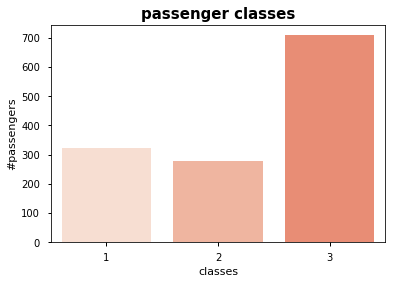

In [26]:
def nice_bar_plot(title, data, n,xlabel,ylabel):
    
    fig, ax = plt.subplots()
    ax.set_title(title, fontsize=15, fontweight='bold')
    sns.barplot(data[:n].keys(), data[:n])
    locs, labels = plt.xticks()
    plt.setp(labels, rotation=0)
    ax.set(xlabel=xlabel, ylabel=ylabel)

tmp = None
tmp = myDf.pclass.value_counts()
nice_bar_plot('passenger classes',tmp,3,'classes','#passengers')

##### histogramm imbarcation port:

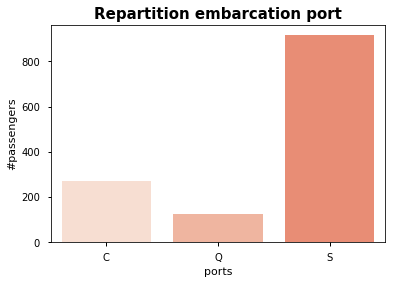

In [27]:
tmp = None
tmp = myDf.embarked.value_counts()
nice_bar_plot('Repartition embarcation port',tmp,3,'ports','#passengers')

##### histogramm gender:

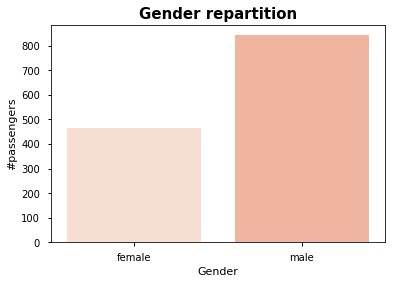

In [28]:
tmp = None
tmp = myDf.sex.value_counts()
nice_bar_plot('Gender repartition',tmp,2,'Gender','#passengers')

##### histogramm age:

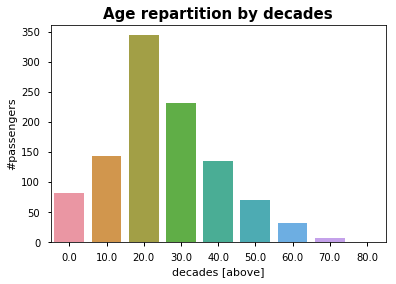

In [29]:
tmp = None
tmp = myDf_decades.age.value_counts()
tmp.sort_index()
nice_bar_plot('Age repartition by decades',tmp,myDf_decades.age.value_counts().shape[0],'decades [above]','#passengers')

where 0.0 means [0,10[ 

## Task 3.3. Question 3: 

Calculate the proportion of passengers by cabin floor. Present your results in a pie chart.

##### If we exclude thoses without cabin (most general of our assunmptions)

In [30]:
floor_count = myDf.cabin.groupby(lambda x: myDf.cabin[x]).size()

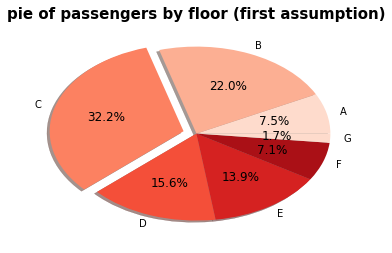

In [31]:
labels = list(floor_count.index)[:-1] # we exclude those without cabins
sizes = list(floor_count)[:-1] # we exclude those without cabins
argmax = np.argmax(sizes)
explode = [0] * len(sizes)
explode[argmax]=0.1
plt.pie(sizes, labels=labels,autopct='%1.1f%%',explode=explode, shadow=True);
plt.title('pie of passengers by floor (first assumption)',fontsize=15, fontweight='bold');

##### if we count the number of cabins (a bit less general assumption)
i.e. if a person has 2 cabins, we will count her/him twice (to implement)

In [32]:
# for cabin count hypothesis: 
tmp = myDf.copy()
tmp['cabin count'] = tmp['cabin count'].astype(int)
grouped = tmp.groupby(by=['cabin'])[['cabin count']].sum()
list(grouped['cabin count'])

[22, 96, 115, 48, 42, 28, 5, 0]

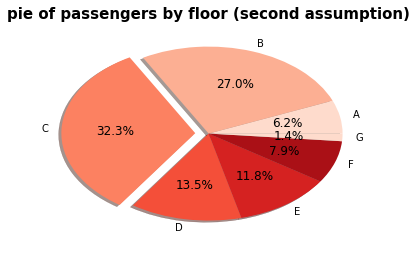

In [33]:
labels = list(grouped.index)[:-1]
sizes = list(grouped['cabin count'])[:-1]
argmax = np.argmax(sizes)
explode = [0] * len(sizes)
explode[argmax]=0.1
plt.pie(sizes, labels=labels,autopct='%1.1f%%',explode=explode, shadow=True);
plt.title('pie of passengers by floor (second assumption)',fontsize=15, fontweight='bold');

## Task 3.4. Question 4:
For each travel class, calculate the proportion of the passengers that survived. Present your results in pie charts.

In [34]:
survived = pd.DataFrame(myDf['pclass'][myDf['survived'] == 1])
total = pd.DataFrame(myDf['pclass'])
grouped_survival = survived.groupby('pclass')
grouped_tot = total.groupby('pclass')
tmp = grouped_survival.size() / grouped_tot.size()

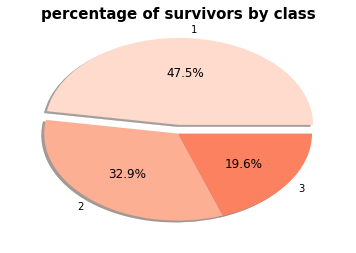

In [35]:
labels = list(tmp.index)
sizes = list(tmp)
argmax = np.argmax(sizes)
explode = [0] * len(sizes)
explode[argmax]=0.1
plt.pie(sizes, labels=labels,autopct='%1.1f%%',explode=explode, shadow=True);
plt.title('percentage of survivors by class',fontsize=15, fontweight='bold');

## Task 3.5. Question 5:
Calculate the proportion of the passengers that survived by travel class and sex. Present your results in a single histogram.

Like the following but with proposrtions:

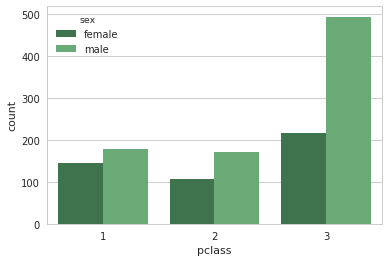

In [36]:
sns.set_style("whitegrid")
ax = sns.countplot(x="pclass", data=myDf,hue="sex", palette="Greens_d");

In [46]:
#for the males
male_survived_byClass = pd.DataFrame(myDf['pclass'][(myDf['survived'] == 1) & (myDf['sex'] == 'male')])
male_byClass = pd.DataFrame(myDf['pclass'][myDf['sex'] == 'male'])

grouped_MS_byClass = male_survived_byClass.groupby('pclass')
grouped_tot_male_byClass = male_byClass.groupby('pclass')

#for the females
female_survived_byClass = pd.DataFrame(myDf['pclass'][(myDf['survived'] == 1) & (myDf['sex'] == 'female')])
female_byClass = pd.DataFrame(myDf['pclass'][myDf['sex'] == 'female'])


grouped_FS_byClass = female_survived_byClass.groupby('pclass')
grouped_tot_female_byClass = female_byClass.groupby('pclass')

proportion_male_byClass = pd.DataFrame(grouped_MS_byClass.size()/grouped_tot_male_byClass.size())
proportion_male_byClass.columns = ['proportions']
proportion_male_byClass['sex'] = 'male'
proportion_male_byClass.reset_index(drop=False,inplace=True)

proportion_female_byClass = pd.DataFrame(grouped_FS_byClass.size()/grouped_tot_female_byClass.size())
proportion_female_byClass.columns = ['proportions']
proportion_female_byClass['sex'] = 'female'
proportion_female_byClass.reset_index(drop=False,inplace=True)

print(proportion_male_byClass )
print(proportion_female_byClass)


# frames = [proportion_female_byClass,proportion_male_byClass ]
survived_bySexClass = proportion_female_byClass.merge(proportion_male_byClass,how='outer')
survived_bySexClass

  pclass  proportions   sex
0      1     0.340782  male
1      2     0.146199  male
2      3     0.152130  male
  pclass  proportions     sex
0      1     0.965278  female
1      2     0.886792  female
2      3     0.490741  female


,pclass,proportions,sex
0,1,0.965278,female
1,2,0.886792,female
2,3,0.490741,female
3,1,0.340782,male
4,2,0.146199,male
5,3,0.152130,male


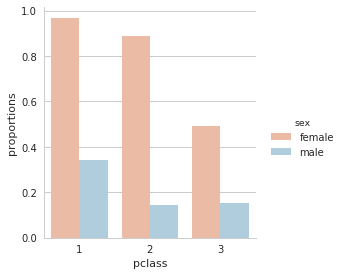

In [52]:
g = sns.factorplot(x="pclass",y='proportions', hue='sex', data=survived_bySexClass, kind="bar",\
                   palette="RdBu",legend=True, margin_titles=True)

The proprotions are w.r.t. themselves, e.g. The first column indicate the proportion of females of first class that survived w.r.t. the total number of females in first class.

Seems like the men have stood up to the sentences "women first"

## Task 3.6. Question 6:    
Create 2 equally populated age categories and calculate survival proportions by age category, travel class and sex. Present your results in a DataFrame with unique index.

##### note 
the categories have been done in "myDf_equalAge" variable

In [53]:
tmp1 = myDf_equalAge [(myDf_equalAge['age'] == 1) ].shape[0]
tmp2 = myDf_equalAge [(myDf_equalAge['age'] == 2) ].shape[0]
print('differences of #passengers between the two classes= ',tmp1-tmp2)

differences of #passengers between the two classes=  0


In [54]:
myDf_equalAge.head()

,index,old index,pclass,survived,sex,age,cabin,embarked,cabin count
0,0,763,3,1,female,1.0,n,S,0
1,1,747,3,0,male,1.0,n,S,0
2,2,1240,3,1,male,1.0,n,C,0
3,3,427,2,1,male,1.0,n,S,0
4,4,1111,3,0,male,1.0,n,S,0


Create df with the proportions of survived young (~= less than 36 years old) females by class

In [55]:
#for the females 1
female_survived_byClass_young = pd.DataFrame(myDf_equalAge['pclass']\
                                     [(myDf_equalAge['survived'] == 1) & \
                                      (myDf_equalAge['sex'] == 'female') &\
                                      (myDf_equalAge['age'] == 1)
                                     ])

female_byClass_young = pd.DataFrame(myDf_equalAge['pclass']\
                                     [(myDf_equalAge['sex'] == 'female') &\
                                      (myDf_equalAge['age'] == 1)
                                     ])

grouped_FSY_byClass = female_survived_byClass_young.groupby('pclass') #F female, S survived, Y young
grouped_tot_FY_byClass = female_byClass_young.groupby('pclass')
proportion_FY_byClass = pd.DataFrame(grouped_FSY_byClass.size()/grouped_tot_FY_byClass.size())
proportion_FY_byClass.columns = ['proportions']
proportion_FY_byClass['sex'] = 'female'
proportion_FY_byClass['age'] = 'Young'
proportion_FY_byClass.reset_index(drop=False,inplace=True)
proportion_FY_byClass

,pclass,proportions,sex,age
0,1,0.951220,female,Young
1,2,0.905660,female,Young
2,3,0.518519,female,Young


Create df with the proportions of survived old (~ 36+ years old) females by class

In [56]:
#for the females 2
female_survived_byClass_old = pd.DataFrame(myDf_equalAge['pclass']\
                                     [(myDf_equalAge['survived'] == 1) & \
                                      (myDf_equalAge['sex'] == 'female') &\
                                      (myDf_equalAge['age'] == 2)
                                     ])

female_byClass_old = pd.DataFrame(myDf_equalAge['pclass']\
                                     [(myDf_equalAge['sex'] == 'female') &\
                                      (myDf_equalAge['age'] == 2)
                                     ])

grouped_FSO_byClass = female_survived_byClass_old.groupby('pclass') # O for old (it is the letter, not a 0)
grouped_tot_FO_byClass = female_byClass_old.groupby('pclass')
proportion_FO_byClass = pd.DataFrame(grouped_FSO_byClass.size()/grouped_tot_FO_byClass.size())
proportion_FO_byClass.columns = ['proportions']
proportion_FO_byClass['sex'] = 'female'
proportion_FO_byClass['age'] = 'Old'
proportion_FY_byClass.reset_index(drop=False,inplace=True)
proportion_FO_byClass

,proportions,sex,age
pclass,,,
1,0.967391,female,Old
2,0.880000,female,Old
3,0.363636,female,Old


##### What about automating this procedure?

In [57]:
def func_q6_bis(df1,df2,sex,age):
    tmp1 = df1.groupby('pclass')
    tmp2 = df2.groupby('pclass')
    return_ = pd.DataFrame(tmp1.size()/tmp2.size())
    return_.columns = ['proportions']
    return_['sex'] = sex
    return_['age'] = age
    return_.reset_index(drop=False,inplace=True)
    return return_

def func_q6(df,sex,age,age_category):
    df1 = pd.DataFrame(df['pclass']\
                       [(df['survived'] == 1) & \
                        (df['sex'] == sex) &\
                        (df['age'] == age_category)
                       ])
    df2 = pd.DataFrame(df['pclass']\
                       [
                        (df['sex'] == sex) &\
                        (df['age'] == age_category)
                       ])   
    return func_q6_bis(df1,df2,sex,age)


We then compute all proportions for each gender and each age category (4 dataframes)

In [58]:
proportions_FY_byClass = func_q6(df=myDf_equalAge ,sex='female',age='young',age_category=1)
proportions_FO_byClass = func_q6(df=myDf_equalAge ,sex='female',age='old',age_category=2)

proportions_MY_byClass = func_q6(df=myDf_equalAge ,sex='male',age='young',age_category=1)
proportions_MO_byClass = func_q6(df=myDf_equalAge ,sex='male',age='old',age_category=2)

proportions_MY_byClass

,pclass,proportions,sex,age
0,1,0.500000,male,young
1,2,0.225352,male,young
2,3,0.186364,male,young


**Finally: ** Aggregate the results in an unique dataframe with unique index

In [59]:
survived_bySexClassAge = proportions_FY_byClass.merge(proportions_FO_byClass,how='outer')\
                                            .merge(proportions_MY_byClass,how='outer')\
                                            .merge(proportions_MO_byClass,how='outer')

survived_bySexClassAge = survived_bySexClassAge[['pclass','sex','age','proportions']].sort_values('pclass')
survived_bySexClassAge.set_index(['pclass', 'sex', 'age'],inplace=True)
survived_bySexClassAge

proportions
pclass sex    age               
1      female young     0.951220
              old       0.967391
       male   young     0.500000
              old       0.314050
2      female young     0.905660
              old       0.880000
       male   young     0.225352
              old       0.080460
3      female young     0.518519
              old       0.363636
       male   young     0.186364
              old       0.139535

Which is the answer of the sixth question.

Conclusions: 

- There are about twice the number of passengers in third class than in the two others which have about the same number of passengers. 
- There are about 1.7 the number of males than females
- Most of the people embarked at Southampton
- Most of the peoples have between 20 and 30 years
- Most of the peoples were in decks B and C (although we weren't able to place a lot of passengers)
- The survival rate of first class passengers is almost as big as the survival rate of the two other classes
- Females have a higher survival rate
- The better passenger class the better the survival rate
- having less than 36 years improves your survival rate 